In [11]:
from lib.utils import *
from lib.models import *
from lib.ekyn import *
from lib.env import *

In [12]:
folds = get_leave_one_out_cv_ids_for_ekyn()

In [13]:
for i,(train_ids,test_ids) in tqdm(enumerate(folds)):
    X_train,y_train = load_psd_label_pairs_windowed(train_ids)
    X_train,X_dev,y_train,y_dev = train_test_split(X_train,y_train,test_size=.25,shuffle=True,random_state=0)
    trainloader = DataLoader(TensorDataset(X_train,y_train),batch_size=32,shuffle=True)
    devloader = DataLoader(TensorDataset(X_dev,y_dev),batch_size=32,shuffle=True)
    

In [14]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=3e-4)

In [15]:
optimization_loop(model,trainloader,devloader,criterion,optimizer,epochs=10,DEVICE=DEVICE)
# dev loss .2249

 Train Loss: 0.2023 Dev Loss: 0.2352: 100%|██████████| 10/10 [01:01<00:00,  6.18s/it]


{'precision': 0.8764102068051526, 'recall': 0.8861260640600962, 'f1': 0.8811418726424868}
0.2318959802494781


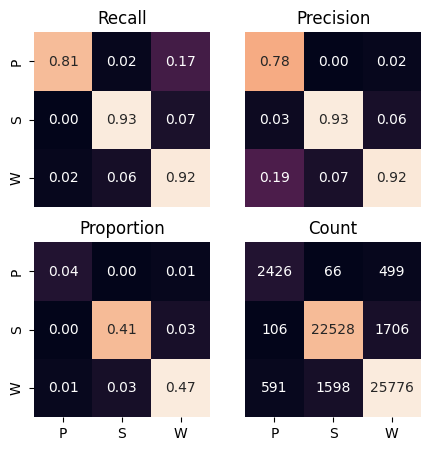

In [9]:
loss,metrics,y_true,y_pred,_ = evaluate(devloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)

{'precision': 0.8726352529552431, 'recall': 0.8918941850057404, 'f1': 0.8817875818383767}
0.22561664562737052


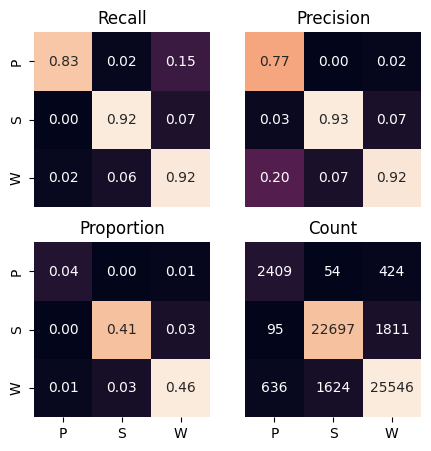

In [10]:
loss,metrics,y_true,y_pred,_ = evaluate(testloader,model,criterion,DEVICE)
cm_grid(y_true=y_true,y_pred=y_pred)
print(metrics)
print(loss)